In [1]:
import tensorflow as tf
import os
from os import listdir
from os.path import isfile, join
import pprint
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
from cnn_feature_extractor import CNNFeatureExtractor
feat_extractor = CNNFeatureExtractor()
sift = cv2.SIFT_create()

In [7]:

import cv2
def match_image(img, img_set):
    img = feat_extractor.load_img(img, preprocess=True)
    #img = cv2.imread(img , cv2.IMREAD_GRAYSCALE)
    matched_imgs = []

    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)   # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    kp1,des1 = feat_extractor.get_keypoints_and_descriptors(img)
    #kp1, des1 = sift.detectAndCompute(img,None)

    for imgB in img_set:
        imgB_path = imgB
        
        imgB = feat_extractor.load_img(imgB, preprocess=True)
        #imgB = cv2.imread(imgB , cv2.IMREAD_GRAYSCALE)

        kp2,des2 = feat_extractor.get_keypoints_and_descriptors(imgB)
        #kp2, des2 = sift.detectAndCompute(imgB,None)
        matches = flann.knnMatch(des1,des2,k=2)

        # ratio test as per Lowe's paper,
        num_good_matches = 0
        good_matches = []
        for i,(m,n) in enumerate(matches):
            if m.distance < .7 * n.distance:
                good_matches.append(m)
                num_good_matches+=1

        matched_imgs.append((imgB_path, num_good_matches))
        matched_imgs.sort(key=lambda x:x[1], reverse=True)
            
                    
    return matched_imgs

In [ ]:
img_dir = './SYS809_projet2021_sequences1'

img_A = './SYS809_projet2021_sequences1/legumesA-00.jpg'
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("legumesB")] 

pprint.pprint(match_image(img_A, img_list_B ))

[('./SYS809_projet2021_sequences1\\legumesB-00.jpg', 17),
 ('./SYS809_projet2021_sequences1\\legumesB-03.jpg', 12),
 ('./SYS809_projet2021_sequences1\\legumesB-08.jpg', 11),
 ('./SYS809_projet2021_sequences1\\legumesB-04.jpg', 9),
 ('./SYS809_projet2021_sequences1\\legumesB-06.jpg', 9),
 ('./SYS809_projet2021_sequences1\\legumesB-02.jpg', 8),
 ('./SYS809_projet2021_sequences1\\legumesB-05.jpg', 6),
 ('./SYS809_projet2021_sequences1\\legumesB-07.jpg', 6),
 ('./SYS809_projet2021_sequences1\\legumesB-09.jpg', 5),
 ('./SYS809_projet2021_sequences1\\legumesB-01.jpg', 4)]


As we can see, **legumesA-00.jpg** is found to have the most corresponding features to **legumesB-00.jpg**, which is indeed correct. 

# Demo 1 : Legumes

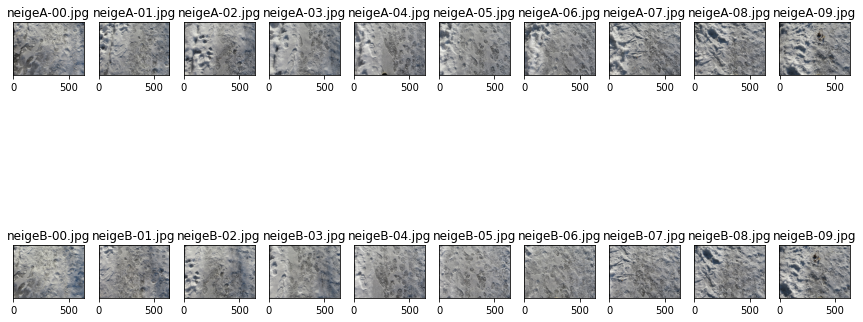

In [17]:
img_dir = './SYS809_projet2021_sequences1'
img_list_A = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("neigeA")] 
img_list_B = [os.path.join(img_dir, f ) for f in listdir(img_dir) if f.startswith("neigeB")] 


fig, ax = plt.subplots(2, len(img_list_A), figsize=(15, 7.5))


for i, img in enumerate(img_list_A):
    #fig, axes = plt.subplots(nrows=2, ncols=len(img_list_A))
    #fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    im_A = image.imread(img)
    name_A = os.path.basename(img)
    ax[0][i].imshow(im_A)
    ax[0][i].set_title(name_A)
    ax[0][i].get_yaxis().set_visible(False)

    im_match = match_image(img, img_list_B )[0][0]
    name_match = os.path.basename(im_match)
    im_match =  image.imread(im_match)
    ax[1][i].imshow(im_match)
    ax[1][i].set_title(name_match)
    ax[1][i].get_yaxis().set_visible(False)
fig.subplots_adjust(wspace=0.2)
